In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
epoch = 30

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()
reversed_word_index = dict([(v, k) for (k, v) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i - 3, ' ? ') for i in x_train[2]])
decoded_review

" ?  this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had  ?  working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how  ?  this is to watch save yourself an hour a bit of your life"

In [5]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [7]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [8]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [9]:
def build_model(input_sh, regularize_l1 = 0.0, regularize_l2 = 0.0):
    network = models.Sequential()
    network.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(regularize_l1, regularize_l2),
                             activation = 'tanh', input_shape=(input_sh,)))
    network.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(regularize_l1, regularize_l2),
                             activation = 'tanh', input_shape=(input_sh,)))
    network.add(layers.Dense(1, activation = 'sigmoid'))
    return network

In [10]:
def run_model(net, train_data, train_target, val_data, val_target, epoch, batch, verbose = 1):
    net.compile(
        loss = 'binary_crossentropy',
        optimizer = 'rmsprop',
        metrics = ['accuracy']
    )
    history = net.fit(
        train_data, train_target,
        validation_data = (val_data, val_target),
        epochs = epoch,
        batch_size = batch,
        verbose = verbose
    )
    return history

In [11]:
normal_net = build_model(partial_x_train.shape[1], 0.0, 0.0)
normal_history = run_model(normal_net, partial_x_train, partial_y_train, x_val, y_val, epoch, 512)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 157us/step - loss: 0.4464 - acc: 0.8149 - val_loss: 0.3419 - val_acc: 0.8678
Epoch 2/30
20000/20000 [==============================] - 3s 134us/step - loss: 0.2509 - acc: 0.9102 - val_loss: 0.2926 - val_acc: 0.8818
Epoch 3/30
20000/20000 [==============================] - 3s 139us/step - loss: 0.1808 - acc: 0.9369 - val_loss: 0.2715 - val_acc: 0.8934
Epoch 4/30
20000/20000 [==============================] - 3s 153us/step - loss: 0.1463 - acc: 0.9473 - val_loss: 0.2874 - val_acc: 0.8906
Epoch 5/30
20000/20000 [==============================] - 3s 137us/step - loss: 0.1189 - acc: 0.9580 - val_loss: 0.3077 - val_acc: 0.8896
Epoch 6/30
20000/20000 [==============================] - 3s 133us/step - loss: 0.0982 - acc: 0.9668 - val_loss: 0.3484 - val_acc: 0.8850
Epoch 7/30
20000/20000 [==============================] - 3s 134us/step - loss: 0.0887 - acc: 0.9701 - val_loss: 0.3651 - v

In [12]:
l1_net = build_model(partial_x_train.shape[1], 0.01, 0.0)
l1_history = run_model(l1_net, partial_x_train, partial_y_train, x_val, y_val, epoch, 512)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 146us/step - loss: 4.1964 - acc: 0.6708 - val_loss: 1.9779 - val_acc: 0.6982
Epoch 2/30
20000/20000 [==============================] - 3s 150us/step - loss: 1.8945 - acc: 0.7361 - val_loss: 1.8771 - val_acc: 0.7098
Epoch 3/30
20000/20000 [==============================] - 3s 163us/step - loss: 1.7992 - acc: 0.7658 - val_loss: 1.8288 - val_acc: 0.6564
Epoch 4/30
20000/20000 [==============================] - 3s 147us/step - loss: 1.7132 - acc: 0.7759 - val_loss: 1.7101 - val_acc: 0.7874
Epoch 5/30
20000/20000 [==============================] - 3s 147us/step - loss: 1.6352 - acc: 0.7908 - val_loss: 1.6350 - val_acc: 0.7978
Epoch 6/30
20000/20000 [==============================] - 3s 139us/step - loss: 1.5704 - acc: 0.7942 - val_loss: 1.5623 - val_acc: 0.8020
Epoch 7/30
20000/20000 [==============================] - 3s 134us/step - loss: 1.5134 - acc: 0.8028 - val_loss: 1.5439 - v

In [13]:
l2_net = build_model(partial_x_train.shape[1], 0.0, 0.01)
l2_history = run_model(l2_net, partial_x_train, partial_y_train, x_val, y_val, epoch, 512)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 146us/step - loss: 0.6966 - acc: 0.8062 - val_loss: 0.5630 - val_acc: 0.8578
Epoch 2/30
20000/20000 [==============================] - 3s 133us/step - loss: 0.5104 - acc: 0.8826 - val_loss: 0.4996 - val_acc: 0.8718
Epoch 3/30
20000/20000 [==============================] - 3s 134us/step - loss: 0.4574 - acc: 0.8917 - val_loss: 0.4782 - val_acc: 0.8662
Epoch 4/30
20000/20000 [==============================] - 3s 136us/step - loss: 0.4203 - acc: 0.8987 - val_loss: 0.4511 - val_acc: 0.8712
Epoch 5/30
20000/20000 [==============================] - 3s 134us/step - loss: 0.3955 - acc: 0.9027 - val_loss: 0.4170 - val_acc: 0.8858
Epoch 6/30
20000/20000 [==============================] - 3s 133us/step - loss: 0.3766 - acc: 0.9039 - val_loss: 0.4039 - val_acc: 0.8834
Epoch 7/30
20000/20000 [==============================] - 3s 134us/step - loss: 0.3585 - acc: 0.9086 - val_loss: 0.4117 - v

In [21]:
l1l2_net = build_model(partial_x_train.shape[1], 0.01, 0.01)
l1l2_history = run_model(l1l2_net, partial_x_train, partial_y_train, x_val, y_val, epoch, 512)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 167us/step - loss: 4.3148 - acc: 0.6619 - val_loss: 2.0263 - val_acc: 0.6828
Epoch 2/30
20000/20000 [==============================] - 3s 144us/step - loss: 1.9543 - acc: 0.6671 - val_loss: 1.9191 - val_acc: 0.5610
Epoch 3/30
20000/20000 [==============================] - 3s 142us/step - loss: 1.8473 - acc: 0.6911 - val_loss: 1.8174 - val_acc: 0.6030
Epoch 4/30
20000/20000 [==============================] - 3s 146us/step - loss: 1.7574 - acc: 0.7084 - val_loss: 1.7303 - val_acc: 0.7162
Epoch 5/30
20000/20000 [==============================] - 3s 141us/step - loss: 1.6775 - acc: 0.7351 - val_loss: 1.6615 - val_acc: 0.6996
Epoch 6/30
20000/20000 [==============================] - 3s 168us/step - loss: 1.6047 - acc: 0.7563 - val_loss: 1.5904 - val_acc: 0.7656
Epoch 7/30
20000/20000 [==============================] - 3s 145us/step - loss: 1.5385 - acc: 0.7779 - val_loss: 1.5315 - v

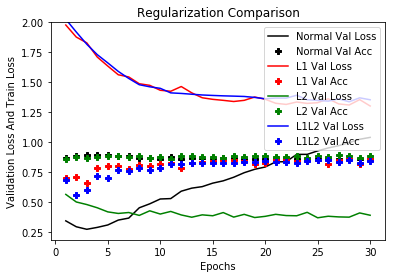

In [39]:
xs = range(1, epoch + 1)
plt.clf()
plt.plot(xs, normal_history.history['val_loss'], 'k', label = 'Normal Val Loss')
plt.plot(xs, normal_history.history['val_acc'], 'kP', label = 'Normal Val Acc')
plt.plot(xs, l1_history.history['val_loss'], 'r', label = 'L1 Val Loss')
plt.plot(xs, l1_history.history['val_acc'], 'rP', label = 'L1 Val Acc')
plt.plot(xs, l2_history.history['val_loss'], 'g', label = 'L2 Val Loss')
plt.plot(xs, l2_history.history['val_acc'], 'gP', label = 'L2 Val Acc')
plt.plot(xs, l1l2_history.history['val_loss'], 'b', label = 'L1L2 Val Loss')
plt.plot(xs, l1l2_history.history['val_acc'], 'bP', label = 'L1L2 Val Acc')
plt.title('Regularization Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss And Train Loss')
plt.ylim(top = 2)
plt.legend(loc = 'upper right')

plt.show()

In [41]:
(loss, acc) = normal_net.evaluate(x_test, y_test)
print("Loss : ", loss, "\tAcc : ", acc)

25000/25000 [==============================] - 5s 210us/step
Loss :  1.1983412257115542 	Acc :  0.8362


In [42]:
(loss, acc) = l1_net.evaluate(x_test, y_test)
print("Loss : ", loss, "\tAcc : ", acc)

25000/25000 [==============================] - 3s 126us/step
Loss :  1.3027807257843018 	Acc :  0.8568


In [43]:
(loss, acc) = l2_net.evaluate(x_test, y_test)
print("Loss : ", loss, "\tAcc : ", acc)

25000/25000 [==============================] - 3s 129us/step
Loss :  0.40786569993972777 	Acc :  0.86848


In [44]:
(loss, acc) = l1l2_net.evaluate(x_test, y_test)
print("Loss : ", loss, "\tAcc : ", acc)

25000/25000 [==============================] - 3s 131us/step
Loss :  1.3538104111480713 	Acc :  0.841
